<a href="https://colab.research.google.com/github/Sumanth2377/EDA-on-100K-US-Tech-Job-Listings/blob/main/EDA_JOB_DES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Team ID: 4, Semester: 4, Division: E, Department: Computer Science
# Title ID: Project Title: "A Data-Driven Analysis of US Hiring Trends"
# Problem Statement: Perform Data-Driven Analysis of US Hiring Trends to understand the hiring patterns and job market to provide better insights to job seekers
#  Members: Sumanth K S - 01FE23BCS236 - 535
#           Arav S      - 01FE23BCS231 - 522
#           Pratyaksh K - 01FE23BCS224 - 531
#           Ravi K      - 01FE23BCS223 - 523

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,poisson
from statsmodels.stats.weightstats import ztest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report,confusion_matrix




In [ ]:
df = pd.read_excel('/content/drive/MyDrive/all_jobs.xlsx')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
length = len(df)
print("Number of recods before PreProcessing -",length)

Number of recods before PreProcessing - 94529


In [ ]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,site,job_url,job_url_direct,title,company,location,...,company_addresses,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,mean_salary,cleaned_description
0,0,0,0,487e95701c0d55b3,indeed,https://www.indeed.com/viewjob?jk=487e95701c0d...,https://jobs.gusto.com/postings/riscpoint-advi...,Cybersecurity Operations Senior Consultant,RISCPoint,"Remote, US",...,"2814 Detroit Ave \nCleveland, Ohio 44113, US",11 to 50,NaN,RISCPoint Advisory Group is an industry leader...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,NaN,120000.0,riscpoint is seeking a conceptual thinker with...
1,1,1,1,679ff0528b73610f,indeed,https://www.indeed.com/viewjob?jk=679ff0528b73...,https://www.marketaxess.com/careers/current-op...,Senior Information Security Engineer (GRC),MarketAxess Holdings,"New York, NY, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0,company description marketaxess is on a journe...
2,2,2,2,41f6f886cd9b9d1d,indeed,https://www.indeed.com/viewjob?jk=41f6f886cd9b...,https://workforcenow.adp.com/mascsr/default/md...,Information System Security Officer II,Global Resource Solutions,"Colorado Springs, CO, US",...,Fairfax,51 to 200,$5M to $25M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,95880.5,"global resource solutions, inc. (grs) is seeki..."
3,3,3,3,f82f829d7cf62384,indeed,https://www.indeed.com/viewjob?jk=f82f829d7cf6...,https://workforcenow.adp.com/mascsr/default/md...,Cyber Operations Support Specialist,"Cole Engineering Services, Inc","Fort Meade, MD, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117500.0,**company overview:** by light professional it...
4,4,4,4,895d9f28e9e5ee10,indeed,https://www.indeed.com/viewjob?jk=895d9f28e9e5...,https://mufgub.wd3.myworkdayjobs.com/MUFG-Care...,"Identity & Access Management, Analyst",MUFG,"Tampa, FL, US",...,Tokyo,"10,000+",more than $10B (USD),MUFG (Mitsubishi UFJ Financial Group) is the s...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,Kevin Cronin,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,96000.0,**do you want your voice heard and your action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94524,94524,34350,704,5e97bb179de9eccf,indeed,https://www.indeed.com/viewjob?jk=5e97bb179de9...,https://www.thedenovo.com/open-positions/?gnk=...,DevOps Engineer 2 (TS/SCI with FS Polygraph),DeNovo Solutions,"Aurora, CO, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127500.0,**position title:** devops engineer 2 **locati...
94525,94525,34351,702,e97feef7014c95c7,indeed,https://www.indeed.com/viewjob?jk=e97feef7014c...,https://marotta.com/job-openings/?gnk=job&gni=...,Full-Stack Developer,Marotta Controls,"Parsippany-Troy Hills, NJ, US",...,"78 Boonton Avenue Montville, NJ 07045\n","501 to 1,000",$25M to $100M (USD),"Marotta Controls, Inc. specializes in the desi...",https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,NaN,121843.5,come grow with marotta! one of nj’s fastest gr...
94526,94526,34352,185,ba3f3c3dde33127c,indeed,https://www.indeed.com/viewjob?jk=ba3f3c3dde33...,https://workforcenow.adp.com/mascsr/default/md...,"Intern, Software Engineering",Dynon Avionics,"Canby, OR, US",...,Woodinville,51 to 200,$5M to $25M (USD),"Dynon Avionics designs, manufactures and distr...",https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,John Torode,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,53040.0,"at dynon, our mission is to create the best av..."
94527,94527,34353,746,c047688e793e3567,indeed,https://www.indeed.com/viewjob?jk=c047688e793e...,https://paperlessenv.bamboohr.com/careers/11?s...,Front End Web Developer,Paperless Environments,"Baton Rouge, LA, US",...,Baton Rouge,2 to 10,$1M to $5M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,79247.5,**abou

In [ ]:
columns_to_drop = [
    'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
    'company_description', 'job_url_direct', 'job_url',
    'job_level', 'job_function', 'company_industry',
    'listing_type', 'emails', 'company_num_employees',
    'company_revenue', 'logo_photo_url', 'ceo_name',
    'ceo_photo_url', 'description', 'company_addresses','currency','banner_photo_url','company_url_direct'
]

df.columns = df.columns.str.strip()

# Drop columns (ignore errors if some columns are missing)
df = df.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
df.columns


Index(['id', 'site', 'title', 'company', 'location', 'job_type', 'date_posted',
       'salary_source', 'interval', 'min_amount', 'max_amount', 'is_remote',
       'company_url', 'mean_salary', 'cleaned_description'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94529 entries, 0 to 94528
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   94529 non-null  object        
 1   site                 94529 non-null  object        
 2   title                94529 non-null  object        
 3   company              93220 non-null  object        
 4   location             94086 non-null  object        
 5   job_type             51639 non-null  object        
 6   date_posted          94529 non-null  datetime64[ns]
 7   salary_source        72422 non-null  object        
 8   interval             75189 non-null  object        
 9   min_amount           72423 non-null  float64       
 10  max_amount           72422 non-null  float64       
 11  is_remote            63918 non-null  float64       
 12  company_url          62258 non-null  object        
 13  mean_salary          72422 non-

In [ ]:
df.head(100000)


,id,site,title,company,location,job_type,date_posted,salary_source,interval,min_amount,max_amount,is_remote,company_url,mean_salary,cleaned_description
0,487e95701c0d55b3,indeed,Cybersecurity Operations Senior Consultant,RISCPoint,"Remote, US",fulltime,2024-10-10,direct_data,yearly,105000.0,135000.0,1.0,https://www.indeed.com/cmp/Riscpoint,120000.0,riscpoint is seeking a conceptual thinker with...
1,679ff0528b73610f,indeed,Senior Information Security Engineer (GRC),MarketAxess Holdings,"New York, NY, US",fulltime,2024-10-10,direct_data,yearly,150000.0,200000.0,0.0,https://www.indeed.com/cmp/Marketaxess-Holdings,175000.0,company description marketaxess is on a journe...
2,41f6f886cd9b9d1d,indeed,Information System Security Officer II,Global Resource Solutions,"Colorado Springs, CO, US",fulltime,2024-10-10,direct_data,yearly,84617.0,107144.0,0.0,https://www.indeed.com/cmp/Global-Resource-Sol...,95880.5,"global resource solutions, inc. (grs) is seeki..."
3,f82f829d7cf62384,indeed,Cyber Operations Support Specialist,"Cole Engineering Services, Inc","Fort Meade, MD, US",NaN,2024-10-10,direct_data,yearly,105000.0,130000.0,0.0,https://www.indeed.com/cmp/Cole-Engineering-Se...,117500.0,**company overview:** by light professional it...
4,895d9f28e9e5ee10,indeed,"Identity & Access Management, Analyst",MUFG,"Tampa, FL, US",fulltime,2024-10-10,direct_data,yearly,83000.0,109000.0,1.0,https://www.indeed.com/cmp/Mufg,96000.0,**do you want your voice heard and your action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94524,5e97bb179de9eccf,indeed,DevOps Engineer 2 (TS/SCI with FS Polygraph),DeNovo Solutions,"Aurora, CO, US",NaN,2024-10-23,direct_data,yearly,90000.0,165000.0,0.0,https://www.indeed.com/cmp/Denovo-Solutions-3,127500.0,**position title:** devops engineer 2 **locati...
94525,e97feef7014c95c7,indeed,Full-Stack Developer,Marotta Controls,"Parsippany-Troy Hills, NJ, US",fulltime,2024-10-02,direct_data,yearly,107530.0,136157.0,0.0,https://www.indeed.com/cmp/Marotta-Controls,121843.5,come grow with marotta! one of nj’s fastest gr...
94526,ba3f3c3dde33127c,indeed,"Intern, Software Engineering",Dynon Avionics,"Canby, OR, US",internship,2024-08-16,direct_data,hourly,49920.0,56160.0,0.0,https://www.indeed.com/cmp/Dynon-Avionics,53040.0,"at dynon, our mission is to create the best av..."
94527,c047688e793e3567,indeed,Front End Web Developer,Paperless Environments,"Baton Rouge, LA, US",fulltime,2022-02-17,direct_data,yearly,69938.0,88557.0,1.0,https://www.indeed.com/cmp/Paperless-Environments,79247.5,**about****us** paperless environments is a we...


In [ ]:
df.isnull().sum()


,0
id,0
site,0
title,0
company,1309
location,443
job_type,42890
date_posted,0
salary_source,22107
interval,19340
min_amount,22106


In [ ]:
df = df.dropna(subset=['job_type'])


In [ ]:
print("No of Rows with Null salary_source",df['salary_source'].isnull().sum())
print("No of Rows with Null interval",df['interval'].isnull().sum())
print("No of Rows with Null company_url",df['company_url'].isnull().sum())
print("No of Rows with Null location",df['location'].isnull().sum())


No of Rows with Null salary_source 5870
No of Rows with Null interval 3426
No of Rows with Null company_url 5757
No of Rows with Null location 0


In [ ]:
for col in ['salary_source', 'interval','company_url','location']:
    df[col] = df[col].fillna('Unknown')

In [ ]:
print("No of Rows with Null salary_source",df['salary_source'].isnull().sum())
print("No of Rows with Null interval",df['interval'].isnull().sum())
print("No of Rows with Null company_url",df['company_url'].isnull().sum())
print("No of Rows with Null location",df['location'].isnull().sum())



No of Rows with Null salary_source 0
No of Rows with Null interval 0
No of Rows with Null company_url 0
No of Rows with Null location 0


In [ ]:
print("No of Rows with Null Min Amount",df['min_amount'].isnull().sum())
print("No of Rows with Null Max Amount",df['max_amount'].isnull().sum())
print("No of Rows with Null Mean Salary",df['mean_salary'].isnull().sum())
print("No of Rows with Null Remote Job",df['is_remote'].isnull().sum())


No of Rows with Null Min Amount 5870
No of Rows with Null Max Amount 5871
No of Rows with Null Mean Salary 5871
No of Rows with Null Remote Job 4819


In [ ]:

df['is_remote'] = df['is_remote'].fillna(df['is_remote'].mode()[0])

for col in ['min_amount', 'max_amount', 'mean_salary']:
    df[col] = df[col].fillna(df.groupby('job_type')[col].transform('median'))

In [ ]:
print("No of Rows with Null Min Amount",df['min_amount'].isnull().sum())
print("No of Rows with Null Max Amount",df['max_amount'].isnull().sum())
print("No of Rows with Null Mean Salary",df['mean_salary'].isnull().sum())
print("No of Rows with Null Remote Job",df['is_remote'].isnull().sum())


No of Rows with Null Min Amount 2
No of Rows with Null Max Amount 2
No of Rows with Null Mean Salary 2
No of Rows with Null Remote Job 0


In [ ]:
df.isnull().sum()


,0
id,0
site,0
title,0
company,999
location,0
job_type,0
date_posted,0
salary_source,0
interval,0
min_amount,2


In [ ]:
df=df.dropna()

In [ ]:
print("No of Rows with Null Min Amount",df['min_amount'].isnull().sum())
print("No of Rows with Null Max Amount",df['max_amount'].isnull().sum())
print("No of Rows with Null Mean Salary",df['mean_salary'].isnull().sum())
print("No of Rows with Null Remote Job",df['is_remote'].isnull().sum())



No of Rows with Null Min Amount 0
No of Rows with Null Max Amount 0
No of Rows with Null Mean Salary 0
No of Rows with Null Remote Job 0


In [ ]:
df.isnull().sum()


,0
id,0
site,0
title,0
company,0
location,0
job_type,0
date_posted,0
salary_source,0
interval,0
min_amount,0


In [ ]:
length = len(df)
print("Number of recods After PreProcessing",length)

Number of recods After PreProcessing 50638


#Data visualization

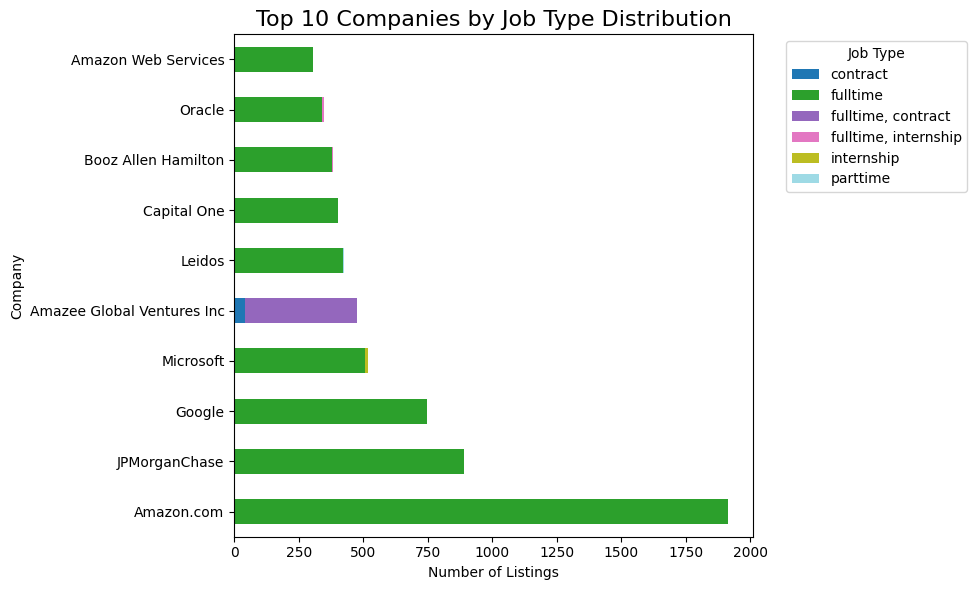

In [ ]:
#How are different job types distributed among the top 10 companies with the most job listings?

top_companies = df['company'].value_counts().head(10).index

top_df = df[df['company'].isin(top_companies)]
grouped = top_df.groupby(['company', 'job_type']).size().unstack(fill_value=0)

grouped = grouped.loc[top_companies]
ax = grouped.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title("Top 10 Companies by Job Type Distribution", fontsize=16)
plt.xlabel("Number of Listings")
plt.ylabel("Company")
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Amazon global ventures inc is a corporate venture capital arm of Amazon.com, Inc. It invests in startups and early-stage companies, often with a focus on areas aligned with Amazon's core businesses and strategic priorities

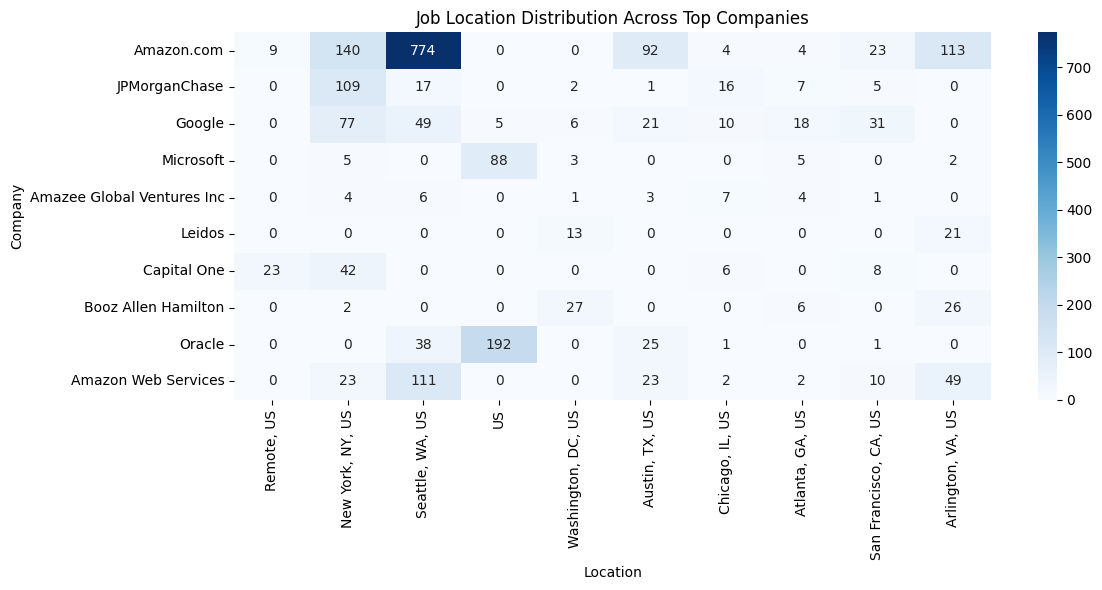

In [ ]:
#How are job locations distributed across top companies?


top_companies = df['company'].value_counts().head(10).index

top_locations = df['location'].value_counts().head(10).index

location_company = pd.crosstab(df['company'], df['location'])

location_company_top = location_company.loc[top_companies, top_locations]

plt.figure(figsize=(12,6))
sns.heatmap(location_company_top, annot=True, fmt='d', cmap='Blues')
plt.title("Job Location Distribution Across Top Companies")
plt.xlabel("Location")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


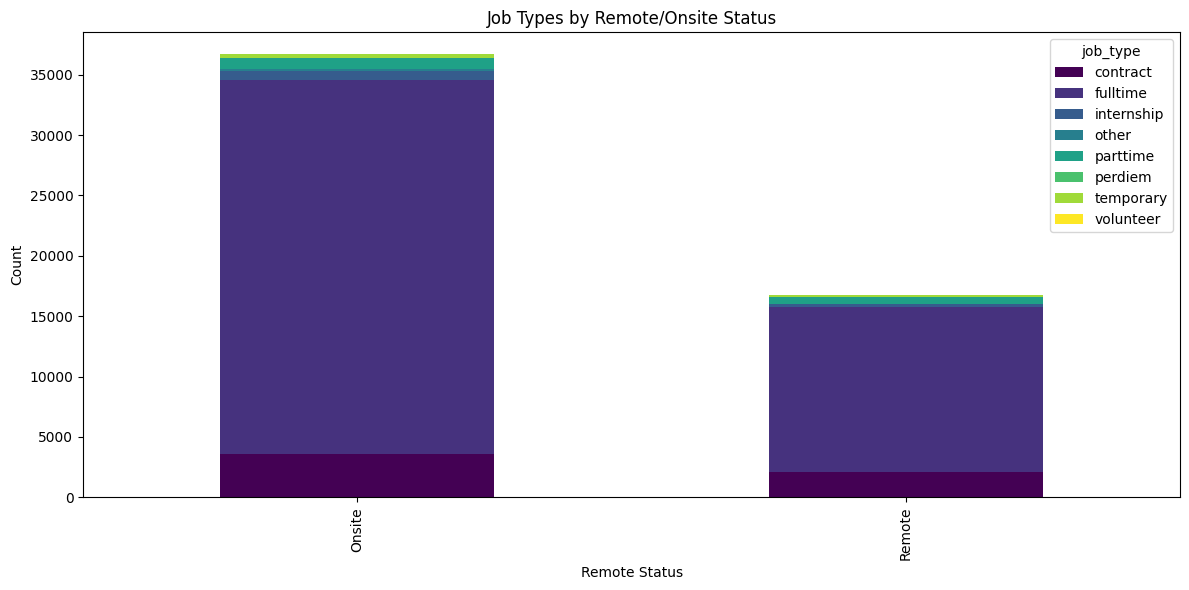

In [ ]:
#Job Type Counts by Remote/Onsite Status

# Split job_type entries by comma and explode to long format
df['job_type'] = df['job_type'].str.lower().str.strip()  # Normalize casing and spacing
job_type_long = df.copy()
job_type_long = job_type_long.assign(job_type=job_type_long['job_type'].str.split(','))
job_type_long = job_type_long.explode('job_type')
job_type_long['job_type'] = job_type_long['job_type'].str.strip()

# Map remote status for better readability
job_type_long['remote_status'] = job_type_long['is_remote'].map({0: 'Onsite', 1: 'Remote'})

# Group and plot
remote_jobtype_counts = job_type_long.groupby(['remote_status', 'job_type']).size().unstack(fill_value=0)
remote_jobtype_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Job Types by Remote/Onsite Status")
plt.xlabel("Remote Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


#delete this before showing it to ma'am
#Per diem, meaning "by the day" in Latin, is a daily allowance provided to employees to cover their travel expenses, such as meals, lodging, and incidental costs, while they are working away from their usual workplace. It's essentially a flat rate per day to cover these expenses, simplifying reimbursement and reducing the need for detailed expense reports.



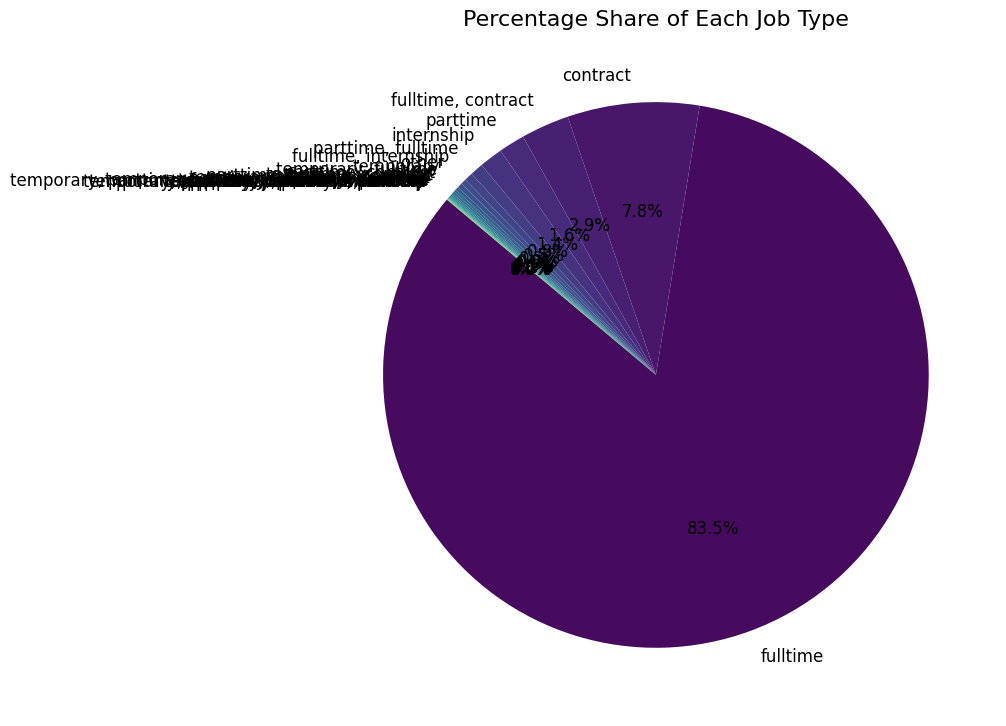

In [ ]:
#Percentage Share of Each Job Type


job_type_counts = df['job_type'].value_counts()

# Set figure size
plt.figure(figsize=(10,10))  # Bigger chart

# Plot pie chart
plt.pie(job_type_counts,
        labels=job_type_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 12},  # Larger text for labels
        colors=sns.color_palette('viridis', len(job_type_counts)))

plt.title("Percentage Share of Each Job Type", fontsize=16)
plt.tight_layout()
plt.show()



#INFERENCES

<ipython-input-33-666d990bc366>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_type', data=df, order=df['job_type'].value_counts().index, palette='viridis')


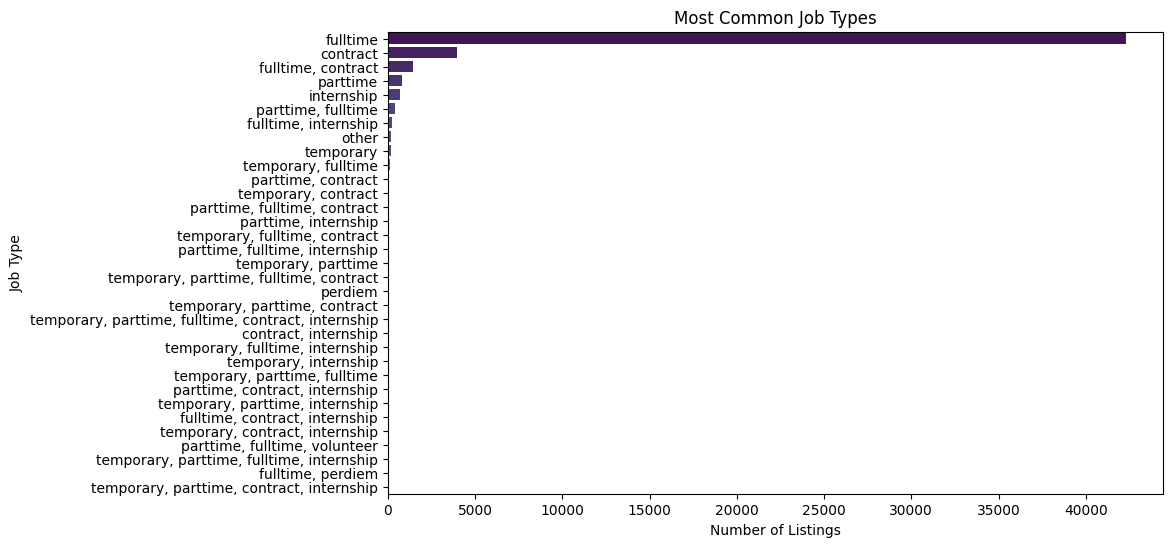

In [ ]:
#The Most Common Job Types


plt.figure(figsize=(10,6))
sns.countplot(y='job_type', data=df, order=df['job_type'].value_counts().index, palette='viridis')
plt.title("Most Common Job Types")
plt.xlabel("Number of Listings")
plt.ylabel("Job Type")
plt.show()


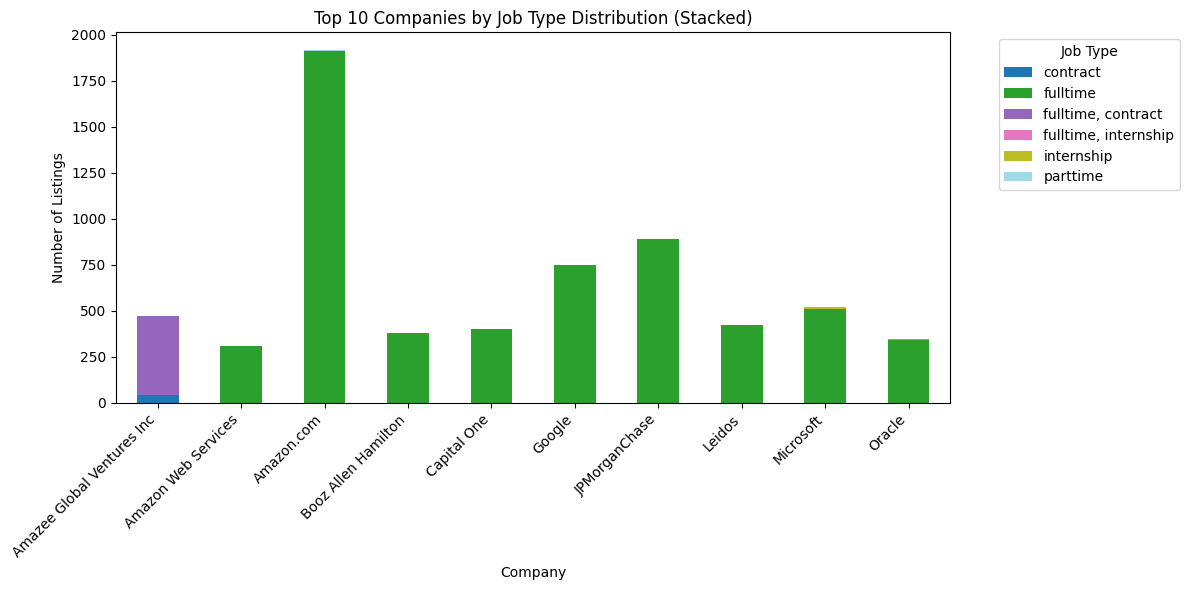

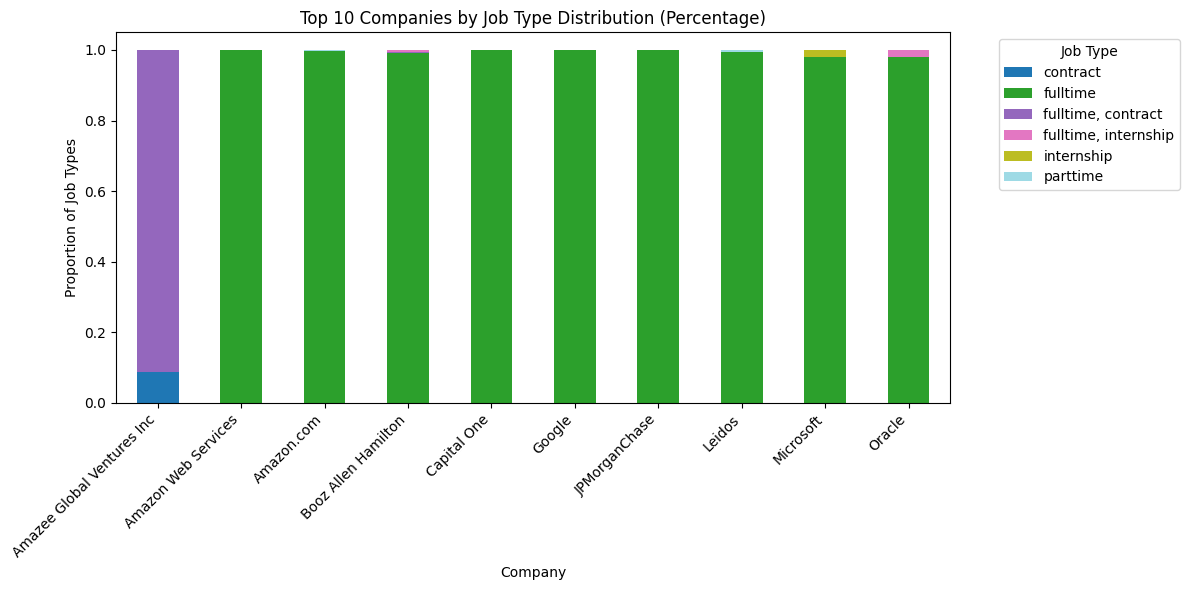

In [ ]:
 #Top Companies Focus on Specific Job Types


company_job_counts = df[df['company'].isin(top_companies)].groupby(['company', 'job_type']).size().unstack(fill_value=0)
company_job_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title("Top 10 Companies by Job Type Distribution (Stacked)")
plt.ylabel("Number of Listings")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#if parttime in the first graph is showing zero

company_job_props = company_job_counts.div(company_job_counts.sum(axis=1), axis=0)

company_job_props.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

plt.title("Top 10 Companies by Job Type Distribution (Percentage)")
plt.ylabel("Proportion of Job Types")
plt.xlabel("Company")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Amazon global ventures inc is a corporate venture capital arm of Amazon.com, Inc. It invests in startups and early-stage companies, often with a focus on areas aligned with Amazon's core businesses and strategic priorities

<ipython-input-35-3baae48e7df2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


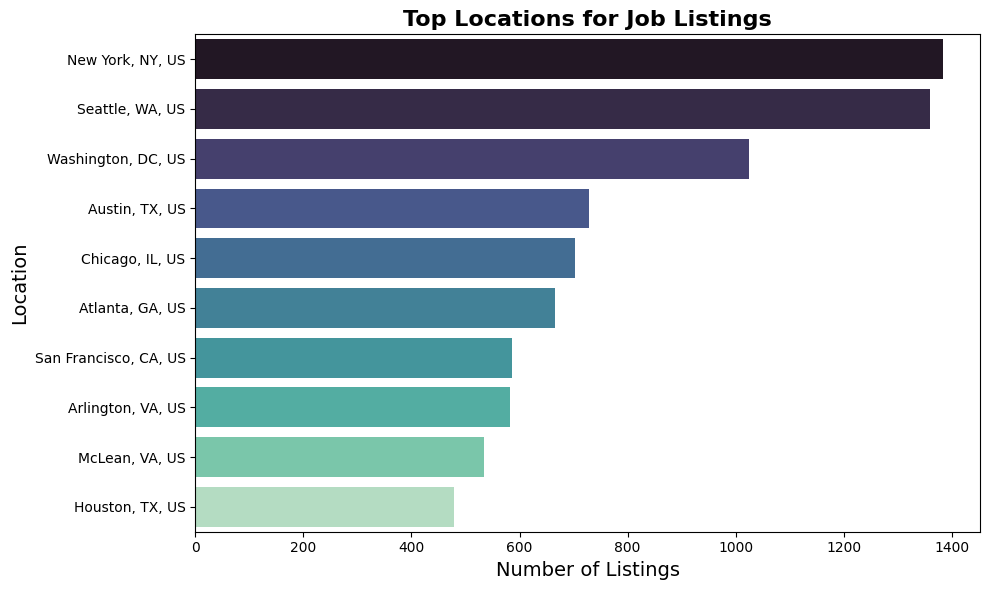

In [ ]:
#Jobs Are Concentrated in Major Cities

exclude_locations = ['Remote, US', 'US']
top_locations = df[~df['location'].isin(exclude_locations)]['location'].value_counts().head(10).index

plt.figure(figsize=(10,6))
sns.countplot(
    data=df[df['location'].isin(top_locations)],
    y='location',
    order=top_locations,
    palette='mako'
)
plt.title("Top Locations for Job Listings", fontsize=16, weight='bold')
plt.xlabel("Number of Listings", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.tight_layout()
plt.show()

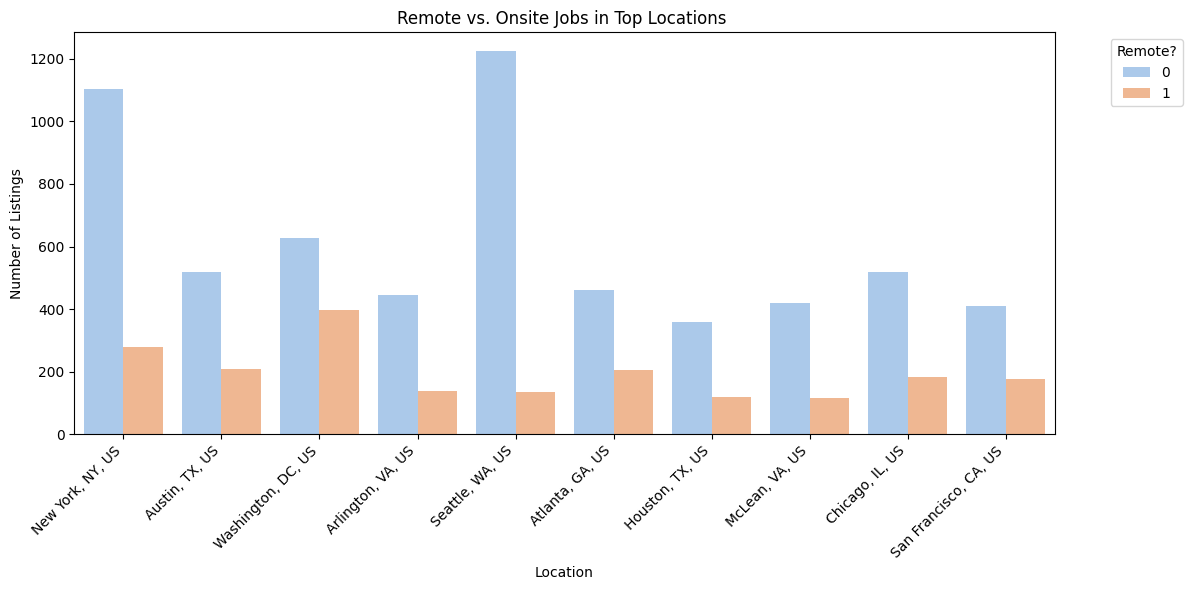

In [ ]:
#Remote Jobs Are More Common in Certain Locations#

exclude_locations = ['Remote, US', 'US','Los Angeles, CA, USA','San Francisco, CA, USA','Seattle, WA, USA' ]

top_locations_filtered = [loc for loc in top_locations if loc not in exclude_locations]

plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df['location'].isin(top_locations_filtered)],
    x='location',
    hue='is_remote',
    palette='pastel',
    hue_order=[0, 1]
)

plt.title("Remote vs. Onsite Jobs in Top Locations ")
plt.xlabel("Location")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote?', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# with 0 as Onsite Jobs (Non-Remote jobs) and 1 as Remote Jobs

<ipython-input-38-a72ec2e9dcc7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary.index, y=avg_salary.values, palette='pastel')


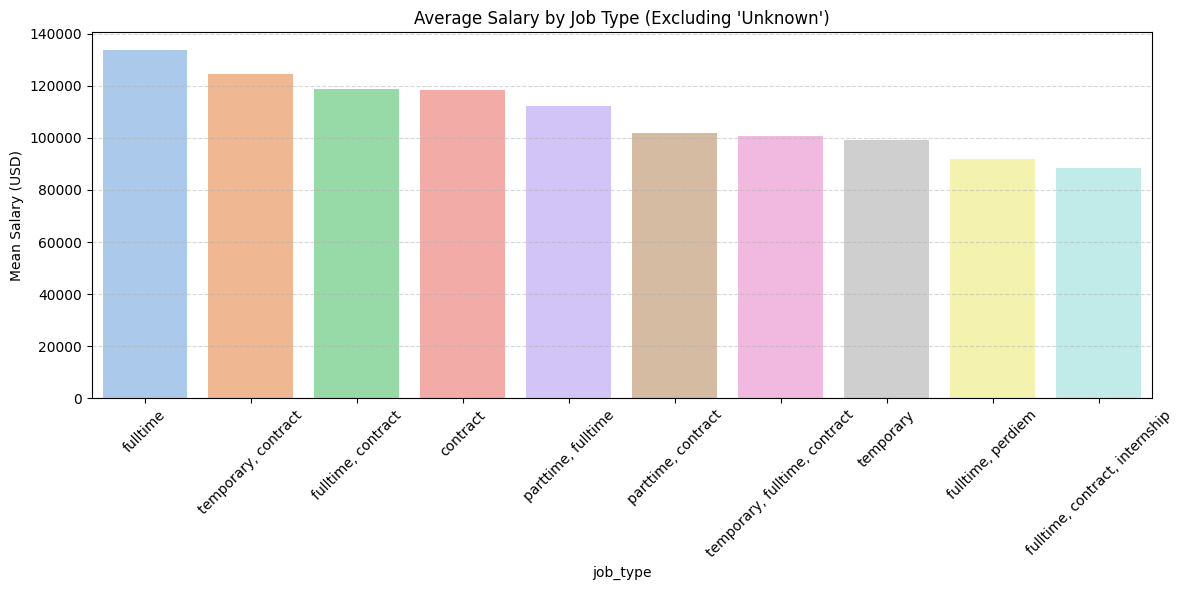

In [ ]:
#Salary Distribution Varies Widely by Job Type


# Remove rows with missing, empty, or 'Unknown' job_type
df_filtered = df[
    df['job_type'].notnull() &
    (df['job_type'].str.strip() != '') &
    (df['job_type'].str.strip().str.lower() != 'unknown')
]

# Compute average salary by job_type
avg_salary = df_filtered.groupby('job_type')['mean_salary'].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=avg_salary.index, y=avg_salary.values, palette='pastel')
plt.xticks(rotation=45)
plt.title("Average Salary by Job Type (Excluding 'Unknown')")
plt.ylabel("Mean Salary (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


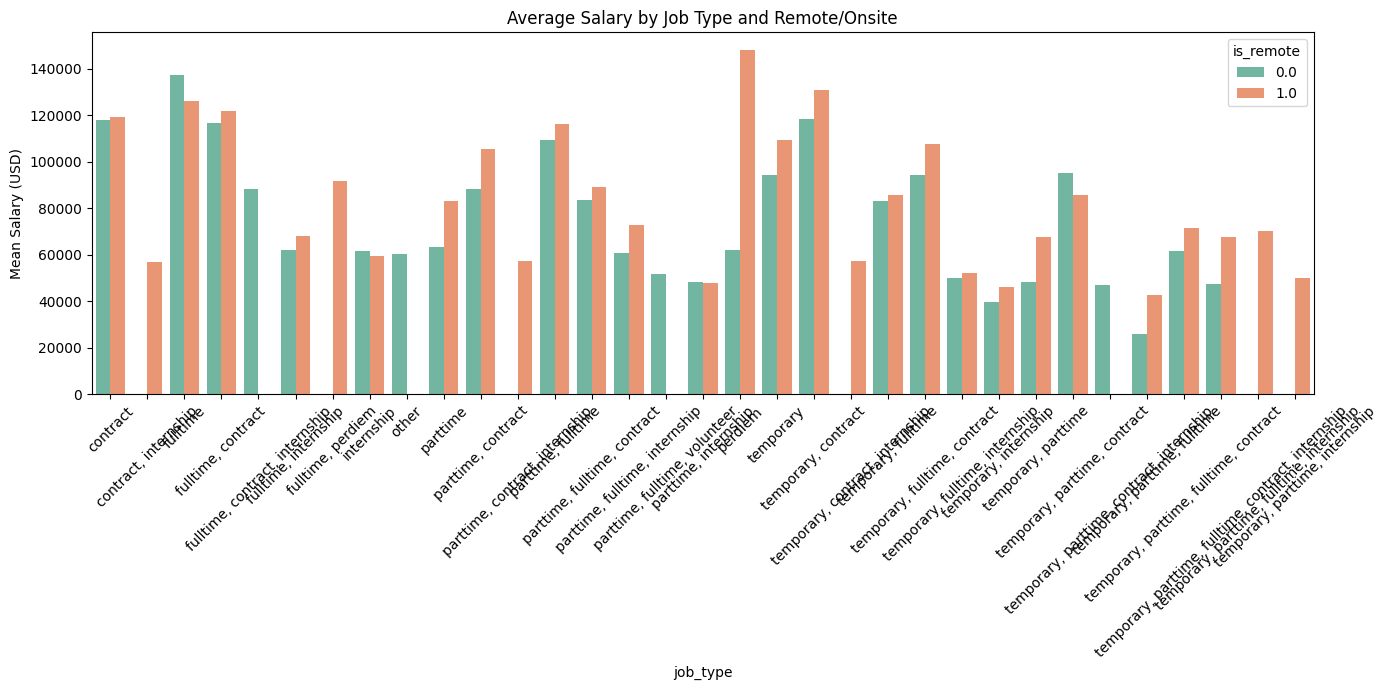

In [ ]:
#Salary Is Also Linked to Remote Work
top_jobs = df['job_type'].value_counts().head(6).index
df_top = df[df['job_type'].isin(top_jobs)]

avg_salary_remote = df.groupby(['job_type', 'is_remote'])['mean_salary'].mean().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(data=avg_salary_remote, x='job_type', y='mean_salary', hue='is_remote', palette='Set2')
plt.xticks(rotation=45)
plt.title("Average Salary by Job Type and Remote/Onsite")
plt.ylabel("Mean Salary (USD)")
plt.tight_layout()
plt.show()


<ipython-input-40-becc6d434cd7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hiring.values, y=top_hiring.index, palette='magma')


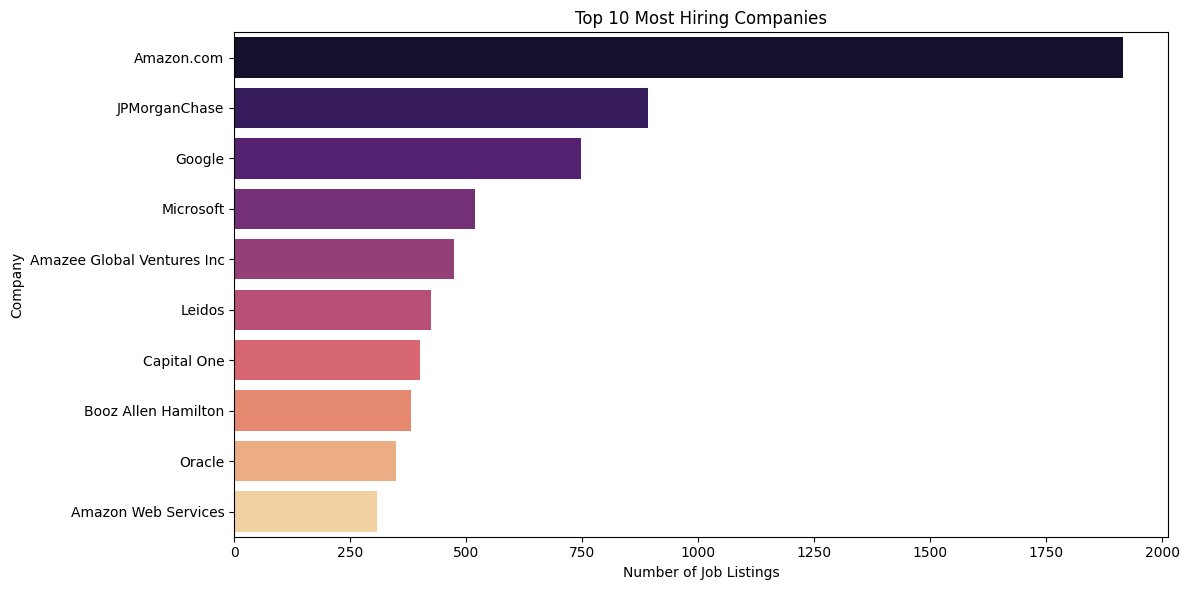

Top 10 Hiring Companies:

company
Amazon.com                    1916
JPMorganChase                  892
Google                         748
Microsoft                      519
Amazee Global Ventures Inc     474
Leidos                         424
Capital One                    401
Booz Allen Hamilton            381
Oracle                         349
Amazon Web Services            307
Name: count, dtype: int64


In [ ]:
#Most Hiring Companies


# Ensure 'df' has the required 'company' column
# Count number of job listings per company
top_hiring = df['company'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hiring.values, y=top_hiring.index, palette='magma')
plt.title("Top 10 Most Hiring Companies")
plt.xlabel("Number of Job Listings")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# Display top companies
print("Top 10 Hiring Companies:\n")
print(top_hiring)


#capital one is bank holding company and leidis is a innovation company that addressing the world's most vexing challenges in national security and health.
#Amazon global ventures inc is a corporate venture capital arm of Amazon.com, Inc. It invests in startups and early-stage companies, often with a focus on areas aligned with Amazon's core businesses and strategic priorities

<ipython-input-41-48bb6f69cbea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['location'].isin(top_locations)], x='location', y='mean_salary', palette='magma', inner='box')


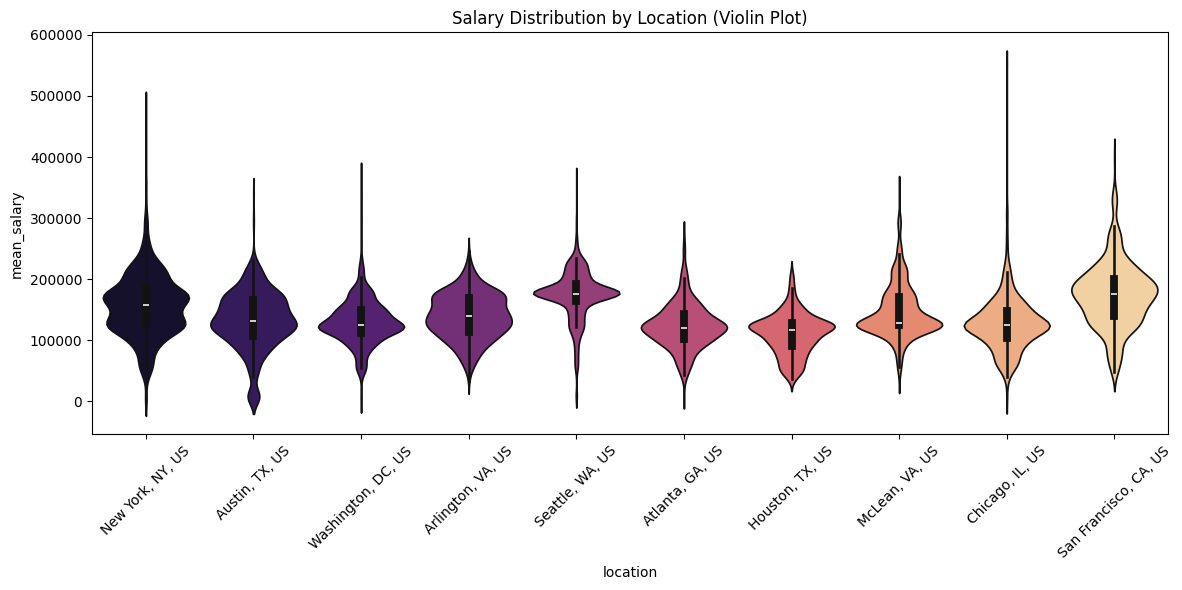

In [ ]:
#Top Locations Offer Better Salaries

exclude_locations = ['Remote, US', 'US']


plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['location'].isin(top_locations)], x='location', y='mean_salary', palette='magma', inner='box')
plt.xticks(rotation=45)
plt.title("Salary Distribution by Location (Violin Plot)")
plt.tight_layout()
plt.show()


#"This violin plot visualizes the salary distribution across the top 10 hiring locations in the dataset.

#Each 'violin' shows not only the average salary, but also the shape of the salary distribution — how concentrated or spread out the salaries are.

#Cities like New York and San Francisco show higher median salaries, along with a wider spread, suggesting both high-paying and mid-tier jobs are common there.

#In contrast, locations like Austin and Denver have more tightly clustered distributions, indicating more consistency in salaries but generally lower pay than top-paying hubs.

#The thicker part in the middle of each violin shows where most salaries lie — giving us an idea of the most common pay range per city.

#This visualization helps us go beyond averages to see real salary dynamics, helping both job seekers and companies understand where value is highest."#

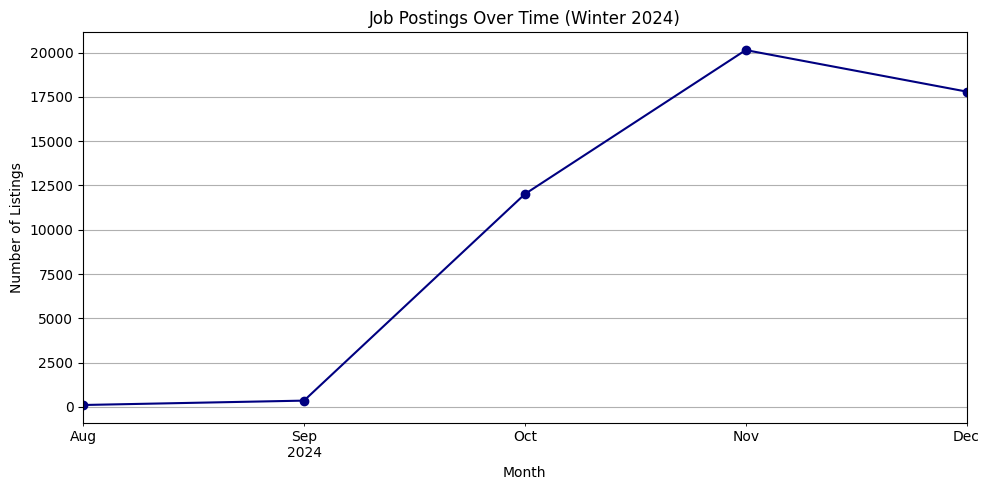

In [ ]:
#Most Jobs Are Posted Recently


df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

df_winter_2024 = df[(df['date_posted'] >= '2024-08-01') & (df['date_posted'] <= '2024-12-31')]

monthly_postings = df_winter_2024['date_posted'].dt.to_period('M').value_counts().sort_index()
monthly_postings.index = monthly_postings.index.to_timestamp()

plt.figure(figsize=(10,5))
monthly_postings.plot(kind='line', marker='o', linestyle='-', color='navy')
plt.title("Job Postings Over Time (Winter 2024)")
plt.xlabel("Month")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.tight_layout()
plt.show()





<ipython-input-43-6510651b677d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_type.values, y=avg_salary_by_type.index, palette="viridis")


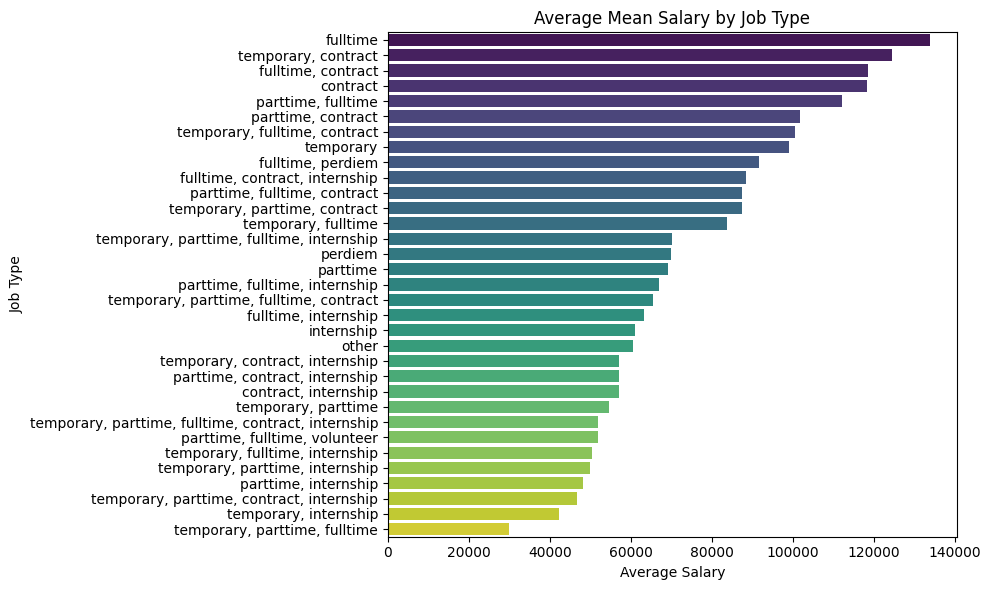

In [ ]:
#Median Salary per Job Type




# Ensure 'mean_salary' is numeric
df["mean_salary"] = pd.to_numeric(df["mean_salary"], errors="coerce")

# Drop rows with missing job_type or mean_salary
df = df.dropna(subset=["job_type", "mean_salary"])

# Group by job_type and calculate average salary
avg_salary_by_type = df.groupby("job_type")["mean_salary"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_type.values, y=avg_salary_by_type.index, palette="viridis")
plt.title("Average Mean Salary by Job Type")
plt.xlabel("Average Salary")
plt.ylabel("Job Type")
plt.tight_layout()
plt.show()



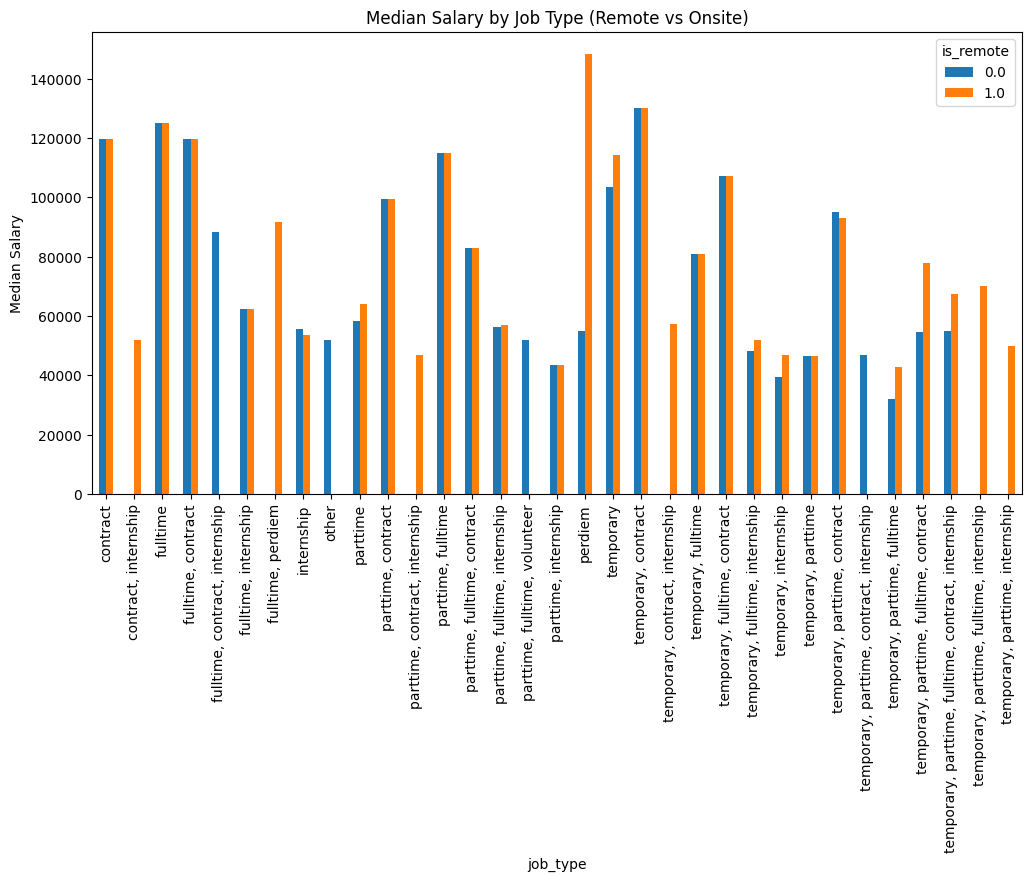

In [ ]:
#Salary Gaps Between Remote and Onsite Roles

df.groupby(['job_type', 'is_remote'])['mean_salary'].median().unstack().plot(kind='bar', figsize=(12,6))
plt.title("Median Salary by Job Type (Remote vs Onsite)")
plt.ylabel("Median Salary")
plt.show()


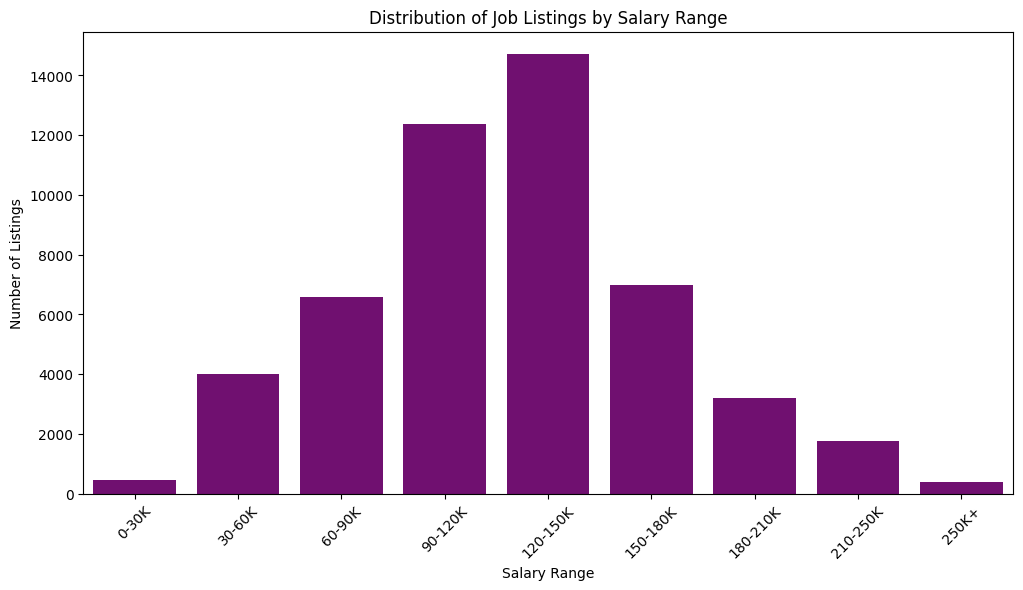

In [ ]:
#Distribution of Job Listings by Salary Range


# Create salary bins
bins = [0, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 250000, 300000]
labels = ['0-30K', '30-60K', '60-90K', '90-120K', '120-150K', '150-180K', '180-210K', '210-250K', '250K+']
df['salary_range'] = pd.cut(df['mean_salary'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='salary_range', color='purple', order=labels)
plt.title("Distribution of Job Listings by Salary Range")
plt.xlabel("Salary Range")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Ensure mean_salary is numeric
df["mean_salary"] = pd.to_numeric(df["mean_salary"], errors="coerce")

# Melt the job type dummy columns into a long format for grouping
job_type_salaries = df.melt(
    id_vars=["mean_salary"],
    value_vars=job_type_dummies.columns,
    var_name="job_type",
    value_name="has_type"
)

# Filter to include only rows where the job type is present
job_type_salaries = job_type_salaries[job_type_salaries["has_type"] == 1]

# Group by job_type and calculate average salary
avg_salary_by_type = job_type_salaries.groupby("job_type")["mean_salary"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_type.values, y=avg_salary_by_type.index, palette="viridis")
plt.title("Average Mean Salary by Job Type")
plt.xlabel("Average Salary")
plt.ylabel("Job Type")
plt.tight_layout()
plt.show()

NameError: name 'job_type_dummies' is not defined

<ipython-input-48-a3efa721df63>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_type_counts.values, y=job_type_counts.index, palette='viridis')


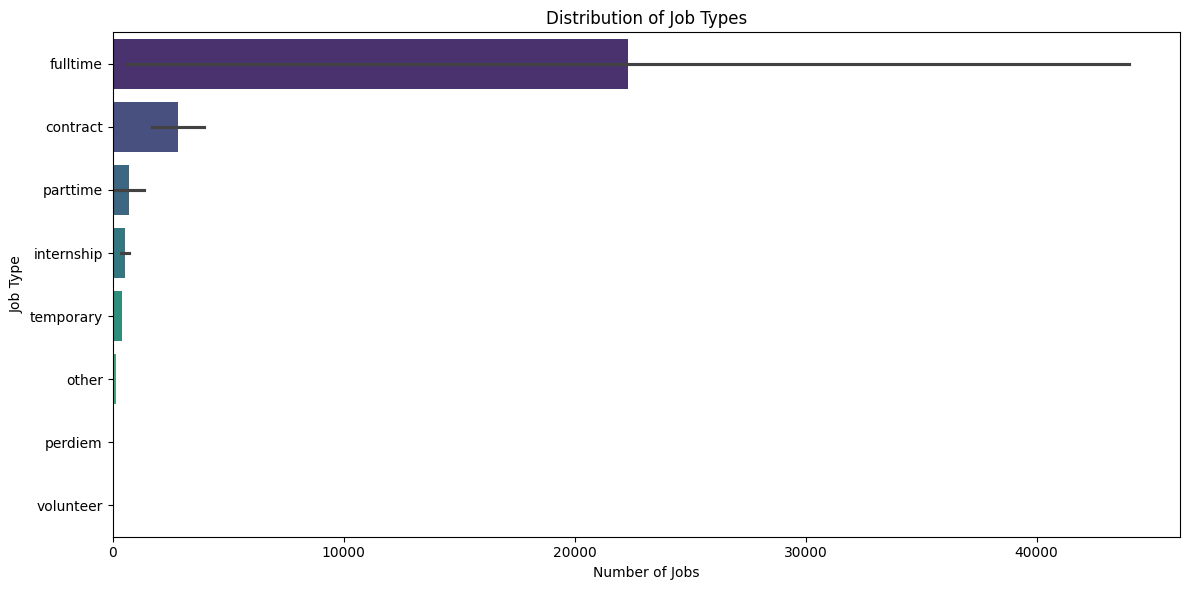

In [ ]:


# Clean the 'job_type' column (replace 'Unnamed: 31' if needed)
df = df.rename(columns={'Unnamed: 31': 'job_type'})

# Fill missing values in 'job_type' column
df['job_type'] = df['job_type'].fillna('')

# One-Hot Encode: Split multiple job types
job_type_dummies = df['job_type'].str.get_dummies(sep=',')
job_type_dummies.columns = job_type_dummies.columns.str.strip().str.lower()

# Add encoded columns back to the dataframe
df = pd.concat([df, job_type_dummies], axis=1)

# Summarize the job types
job_type_counts = job_type_dummies.sum().sort_values(ascending=False)

# Plot the job type distribution
plt.figure(figsize=(12,6))
sns.barplot(x=job_type_counts.values, y=job_type_counts.index, palette='viridis')
plt.xlabel("Number of Jobs")
plt.ylabel("Job Type")
plt.title("Distribution of Job Types")
plt.tight_layout()
plt.show()


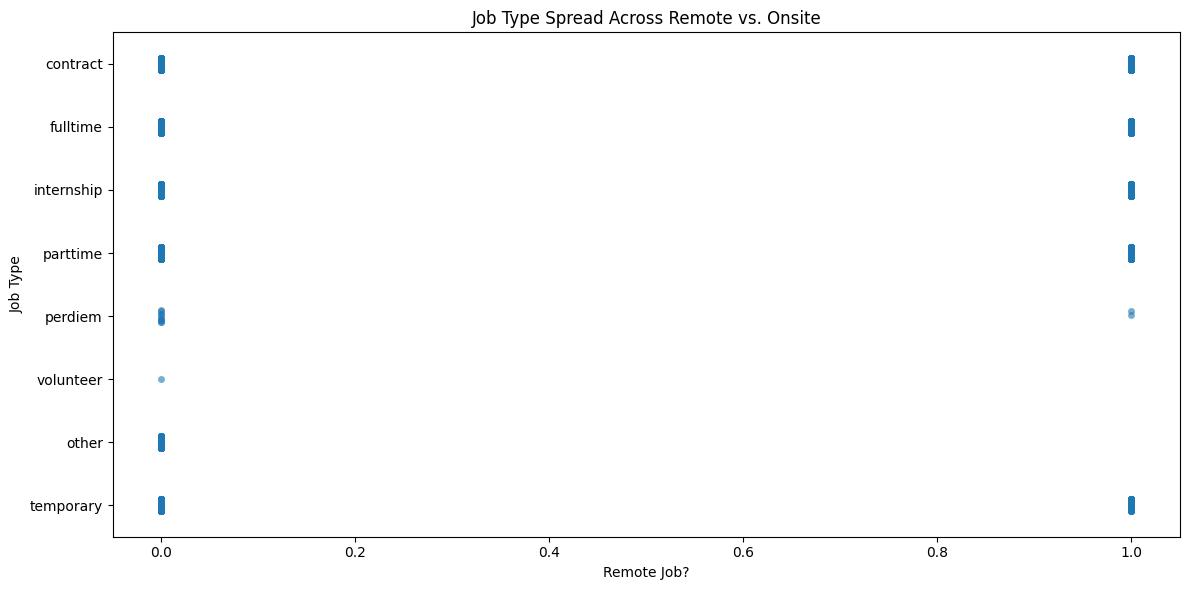

In [ ]:
# Melt the dataframe: Get 'is_remote' + job types in long form
job_type_long = df.melt(id_vars=['is_remote'], value_vars=job_type_dummies.columns,
                        var_name='job_type', value_name='has_job_type')

# Filter rows where the job type applies (has_job_type == 1)
job_type_long = job_type_long[job_type_long['has_job_type'] == 1]

# Now create the stripplot
plt.figure(figsize=(12,6))
sns.stripplot(data=job_type_long, x='is_remote', y='job_type', jitter=True, alpha=0.6)
plt.title("Job Type Spread Across Remote vs. Onsite")
plt.xlabel("Remote Job?")
plt.ylabel("Job Type")
plt.tight_layout()
plt.show()


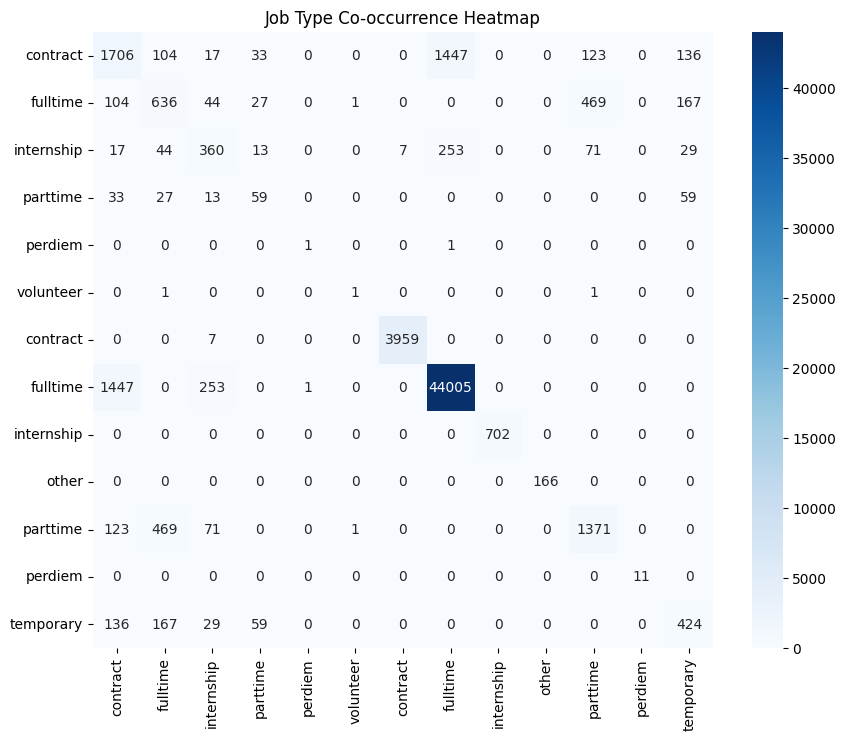

In [ ]:
# Heatmap of Job Type Co-occurrence
cooccurrence = job_type_dummies.T.dot(job_type_dummies)

plt.figure(figsize=(10,8))
sns.heatmap(cooccurrence, annot=True, fmt='d', cmap='Blues')
plt.title("Job Type Co-occurrence Heatmap")
plt.show()


##Models Used

In [ ]:
top_companies = df['company'].value_counts().nlargest(20).index
df_top = df[df['company'].isin(top_companies)]

X = df_top[['mean_salary']]
y = df_top['company']

le_company = LabelEncoder()
y_encoded = le_company.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

import numpy as np
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, labels=unique_classes, target_names=le_company.inverse_transform(unique_classes))
)


Accuracy: 0.77

Classification Report:
                             precision    recall  f1-score   support

Amazee Global Ventures Inc       0.98      1.00      0.99        90
       Amazon Web Services       0.58      0.28      0.38        68
                Amazon.com       0.79      0.88      0.83       372
                   Amentum       0.18      0.16      0.17        25
                     Apple       0.83      0.94      0.88        48
       Booz Allen Hamilton       0.97      1.00      0.99        73
        CACI International       0.90      0.93      0.91        46
                 Capgemini       0.43      0.44      0.44        36
               Capital One       0.87      0.49      0.62        82
                      Citi       0.78      0.74      0.76        43
                  Deloitte       0.65      0.55      0.60        65
                    Google       0.95      0.90      0.92       161
           Intone Networks       0.26      0.15      0.19        41
       


Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

      Onsite       0.80      0.91      0.85      7026
      Remote       0.69      0.48      0.57      3102

    accuracy                           0.77     10128
   macro avg       0.74      0.69      0.71     10128
weighted avg       0.76      0.77      0.76     10128



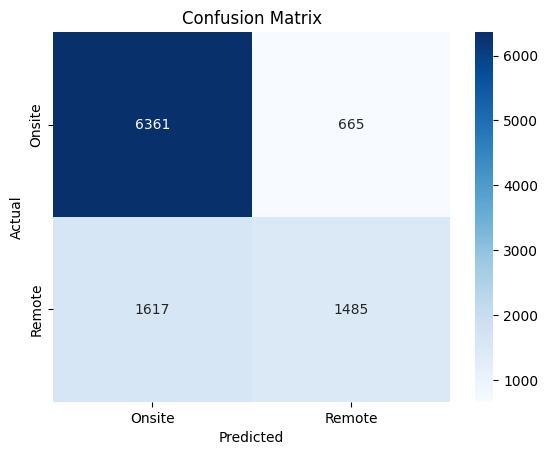

In [ ]:
le_job_type = LabelEncoder()
le_location = LabelEncoder()
le_interval = LabelEncoder()
le_salary_source = LabelEncoder()

df['job_type_enc'] = le_job_type.fit_transform(df['job_type'])
df['location_enc'] = le_location.fit_transform(df['location'])
df['interval_enc'] = le_interval.fit_transform(df['interval'])
df['salary_source_enc'] = le_salary_source.fit_transform(df['salary_source'])

features = ['mean_salary', 'min_amount', 'max_amount', 'job_type_enc', 'location_enc', 'interval_enc', 'salary_source_enc']
X = df[features]
y = df['is_remote'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Onsite', 'Remote']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Onsite', 'Remote'], yticklabels=['Onsite', 'Remote'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

df = df.dropna(subset=['company', 'title', 'location', 'mean_salary', 'is_remote'])
df['mean_salary'] = pd.to_numeric(df['mean_salary'], errors='coerce')
df = df.dropna(subset=['mean_salary'])

le_company = LabelEncoder()
le_title = LabelEncoder()
le_location = LabelEncoder()

df['company_enc'] = le_company.fit_transform(df['company'].astype(str))
df['title_enc'] = le_title.fit_transform(df['title'].astype(str))
df['location_enc'] = le_location.fit_transform(df['location'].astype(str))

X = df[['company_enc', 'title_enc', 'location_enc', 'mean_salary']]
y = df['is_remote']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Classification Report (KNN - Remote vs Onsite):")
print(classification_report(y_test, y_pred))

Classification Report (KNN - Remote vs Onsite):
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81      7026
         1.0       0.57      0.47      0.52      3102

    accuracy                           0.73     10128
   macro avg       0.68      0.66      0.66     10128
weighted avg       0.72      0.73      0.72     10128

